### Is there a correlation between post language and identified mentioned locations? `(Todd)`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

In [2]:
df = pd.read_csv('../Datasets/Master_Dataset_TranslactionsDetoxifiedGeoTopic.csv')

# set the width of the 'Narrative' column to 100 characters
pd.options.display.max_colwidth = 100

/var/folders/fn/pdhscw6s1wz7r1wk9ssprtz80000gn/T/ipykernel_24044/1551078304.py:1: DtypeWarning: Columns (0,1,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Datasets/Master_Dataset_TranslactionsDetoxifiedGeoTopic.csv')


In [3]:
df.columns

Index(['Unnamed: 0', 'Story Primary ID', 'Story ID', 'User Primary ID',
       'User ID', 'Gender', 'Age', 'Title', 'Narrative', 'Media',
       'Account Created Date', 'Date (No Timestamp)', 'Interest',
       'Narrative TikaDetect', 'Title TikaDetect', 'Narrative LangDetect',
       'Title LangDetect', 'Translated Narrative', 'Translated Title',
       'toxicity', 'severe_toxicity', 'obscene', 'identity_attack', 'insult',
       'threat', 'sexual_explicit', 'GeoTopic Name', 'GeoTopic Latitude',
       'GeoTopic Longitude'],
      dtype='object')

In [4]:
df.sample(5)

,Unnamed: 0,Story Primary ID,Story ID,User Primary ID,User ID,Gender,Age,Title,Narrative,Media,...,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,GeoTopic Name,GeoTopic Latitude,GeoTopic Longitude
84727,84725,135551,STY1661945869,84326,USR1661945701,NaN,25,Jai Hind,Jai Hind,https://image.pixstory.com/Pixstory-image-166194583971270.png,...,0.000376,0.000001,0.000026,0.000074,0.000099,0.000019,0.000015,NaN,NaN,NaN
27711,27711,120609,STY1659304586,20802,USR1642092657,male,33,"Formula E: Di Grassi vince gara-2, Vandoorne sempre più leader",Proprio quando sembrava potersi concretizzare il sogno di Jake Dennis di portare a compimento il...,https://image.pixstory.com/Pixstory-image-165930442228176.jpeg,...,0.006173,0.000008,0.000121,0.004691,0.000868,0.000041,0.000076,London,51.49227,-0.30864
19985,19985,84020,STY1645941313,11835,USR1638362514,male,12,মিহিমুখত হাতীত উঠি কাজিৰঙা ৰাষ্ট্ৰীয় উদ্যান দৰ্শন ৰাষ্ট্ৰপতিৰ; অসমৰ ভীম কল লৈ যাব ৰাষ্ট্ৰপতি ক,অসমৰ ভীম কল লাগে দেশৰ ৰাষ্ট্ৰপতি ৰামনাথ কোবিন্দক ৷ আজি পুৱাতে কাজিৰঙা ৰাষ্ট্ৰীয় উদ্যানৰ মিহিমুখত...,https://image.pixstory.com/Pixstory-image-164594125186822.png,...,0.000492,0.000002,0.000046,0.000083,0.000114,0.000018,0.000017,NaN,NaN,NaN
57864,57864,99675,STY1652273441,33892,USR1650981290,NaN,19,Experience More of the World!,"Asia, Australia, Central America and South America!\n\nFor different people from different parts...",https://image.pixstory.com/Pixstory-image-165227326257650.png,...,0.000670,0.000002,0.000045,0.000089,0.000141,0.000039,0.000018,South America,-14.60485,-57.65625
64080,64078,107679,STY1655385102,45128,USR1655384238,NaN,43,#অসমৰ পৰম্পৰা বান পানীৰ\n উৎসৱত কাৰ কিৰিলি ????\n\n1/2 (প্ৰথম খণ্ড),"সময় গতিশীল ৷৷ দিন, ৰাতি, মাহ , বছৰ বিলাক বাগৰি য়ে আছে ৷৷ কাৰোবাৰ অপেক্ষাত ""সময়ে"" ক্ষন্তেক ৰবলৈও ...",https://image.pixstory.com/Pixstory-image-16553846174941.png,...,0.000879,0.000001,0.000034,0.000096,0.000196,0.000036,0.000015,NaN,NaN,NaN


In [5]:
# replace df with your original DataFrame
df = df.loc[:, ["Narrative LangDetect", "GeoTopic Name"]]

In [6]:
df['Narrative LangDetect'] = df['Narrative LangDetect'].astype(str)
df['GeoTopic Name'] = df['GeoTopic Name'].astype(str)

In [7]:
# remove rows with 'GeoTopic Name' of 'nan'
df = df[df['GeoTopic Name'] != 'nan']

In [8]:
# df.sample(20)[['Narrative', 'GeoTopic Name', 'GeoTopic Latitude', 'GeoTopic Longitude']]
df.sample(5)

,Narrative LangDetect,GeoTopic Name
4884,en,British Indian Ocean Territory
84883,en,Village of Malmo
47402,en,Manchester City Centre
7730,en,Manchester
15678,en,Miami County


# Language vs Location

In [9]:
# count the frequency of each GeoTopic Name
counts = df['GeoTopic Name'].value_counts()

# filter to include only GeoTopic Names with 10 or more counts
valid_names = counts[counts >= 200].index

# filter the original dataframe using the valid GeoTopic Names
df = df[df['GeoTopic Name'].isin(valid_names)]

In [10]:
# df = df.iloc[:10000]

In [11]:
# create a pivot table
pivot_table = df.pivot_table(index='Narrative LangDetect', columns='GeoTopic Name', aggfunc=len, fill_value=0)

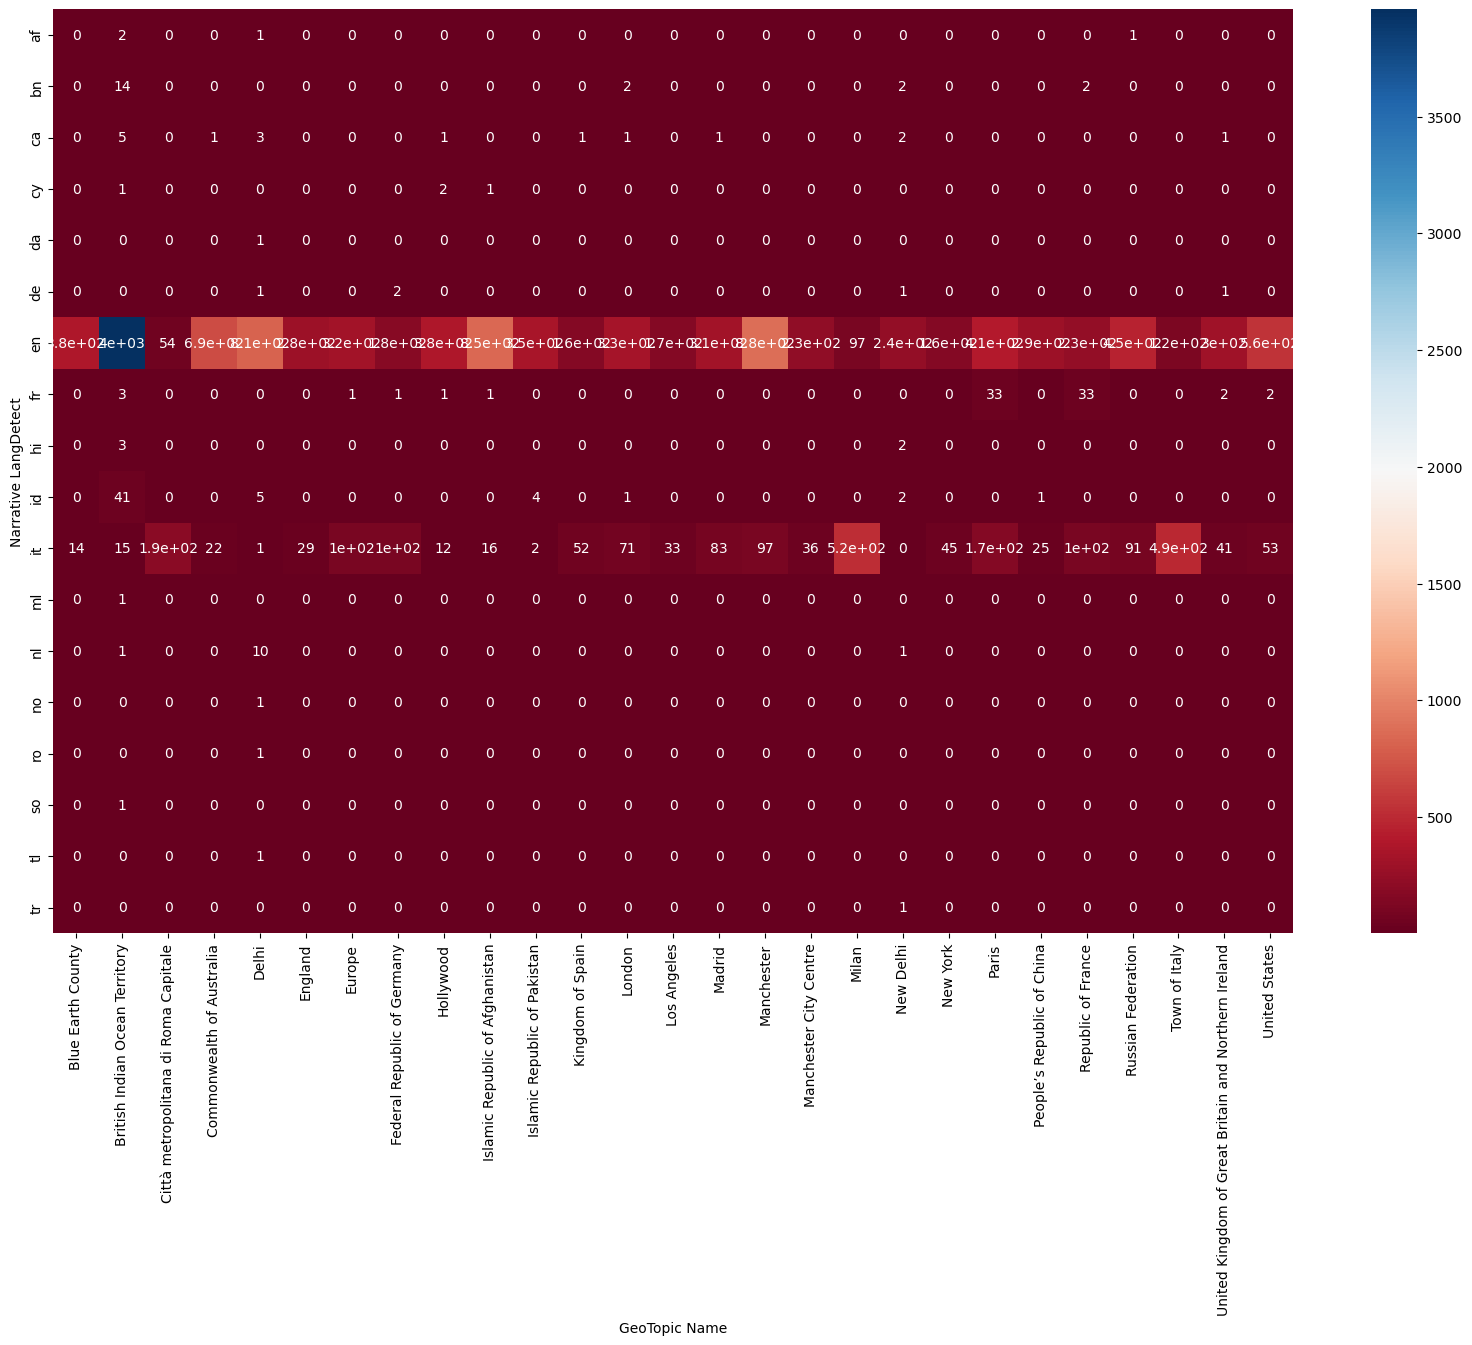

In [12]:
# Set figure size
fig, ax = plt.subplots(figsize=(20, 12))

# create a heatmap
sns.heatmap(pivot_table, annot=True, cmap='RdBu', vmin=1, vmax=pivot_table.values.max())

# Save the chart as a PNG image
fig.savefig('q2_figures/googleLanguageVsLocationHeatMap.png')

# Show figure
plt.show()

# Close the figure to free up memory
plt.close(fig)